In [42]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

---
# Avec Scikit Learn

In [26]:
data = pd.read_csv("USArrests.csv", sep = "t")

In [72]:
data.shape

(50, 4)

In [70]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [27]:
data.dtypes

Murder      object
Assault      int64
UrbanPop     int64
Rape        object
dtype: object

In [28]:
data.Murder.head(5)

Alabama       13,2
Alaska          10
Arizona        8,1
Arkansas       8,8
California       9
Name: Murder, dtype: object

In [29]:
data.Rape.head(5)

Alabama       21,2
Alaska        44,5
Arizona         31
Arkansas      19,5
California    40,6
Name: Rape, dtype: object

In [32]:
data.Murder = data.Murder.apply(lambda x : x.replace(",", "."))
data.Rape = data.Rape.apply(lambda x : x.replace(",", "."))

In [34]:
data.head(5)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10,263,48,44.5
Arizona,8.1,294,80,31
Arkansas,8.8,190,50,19.5
California,9,276,91,40.6


In [36]:
data = data.astype(float)

In [39]:
data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [89]:
n_clusters = 3
y_pred = AgglomerativeClustering(n_clusters = n_clusters).fit_predict(data)

In [90]:
y_pred

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

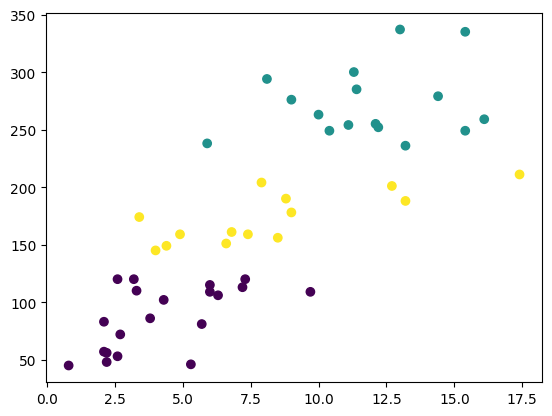

In [91]:
plt.scatter(data.Murder, data.Assault, c = y_pred)

---
# Avec Scipy

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [ ]:
link_matrix = linkage(data, method = "ward")

In [79]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.

    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.

    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.

    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the number of

In [74]:
np.shape(link_matrix)

(49, 4)

In [77]:
link_matrix.shape

(49, 4)

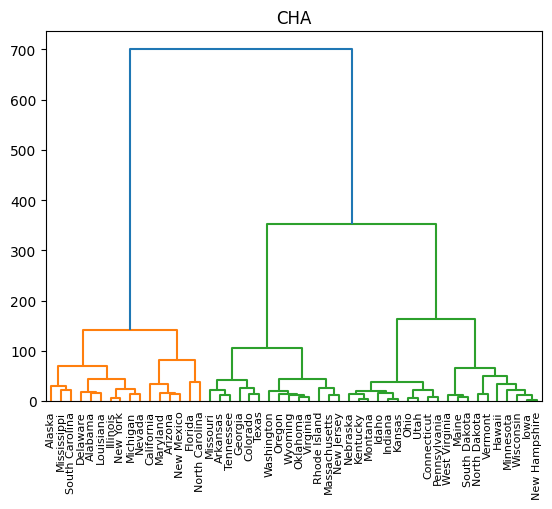

In [66]:
plt.title("CHA")
dendrogram(link_matrix, labels = data.index)
plt.show();

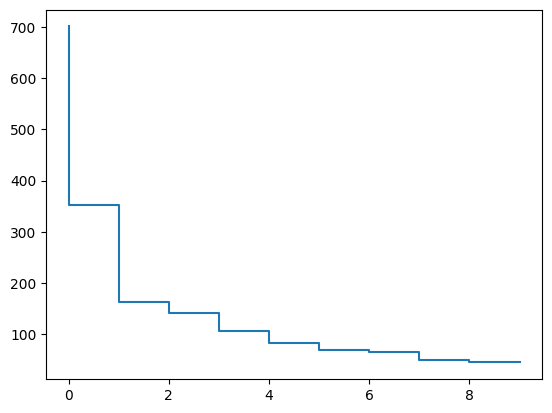

In [88]:
plt.step(range(10), link_matrix[-10:, 2][::-1])